-- Correlation
liest CSV-Dateien und erstellt eine Korrelationsmatrix.
verwendet getQuotes.sh zum Holen der Daten.

✓ ToDo: Ökoworld Klima und Classic ergänzt

In [100]:
import pandas as pd

In [101]:
import numpy as np

In [102]:
import matplotlib.pyplot as plt

In [103]:
import seaborn as sns

In [104]:
from datetime import datetime
from datetime import date
from datetime import timedelta

In [105]:
def floatconv(val):
    try:
        if val.strip():
            return float(val.replace('.','').replace(',','.'))
        else:
            return 0
    except ValueError as ve:
        print("VALUE NOT USABLE: #{}#".format(val))

In [106]:
intconv = lambda val: 0 if len(str(val)) < 2 else float(str(val).replace('.',''))
converter = {'Erster':floatconv, 'Hoch':floatconv, 'Tief':floatconv, 'Schlusskurs':floatconv, 'Volumen':intconv}

historische Kurse holen von hier:  
http://www.ariva.de/dax-index/historische_kurse  
typischerweise ca. 10 Jahre, Trenner ;

In [107]:
wkn2name = {"865985":"Apple", "A1EWWW":"Adidas", "A0WMPJ":"Aixtron", "846900":"DAX","A0KRKM":"Brent Oil",
           "COM062":"Brent Oil (Subst)", "581005":"Deutsche Börse", "555750":"DTE", "927200":"Dialog Semiconductor", 
           "555063":"Drägerwerk", "976986":"DWS Akt. St. DL",
           "ETF047" : "PSI (ETF047)", "965508": "PSI20", "577220" : "Fielmann", "A0Z2ZZ":"Freenet",
           "840221":"Hannover Rück","851399":"IBM","623100":"Infineon","KGX888":"Kion","LS9AJF":"LS9AJF",
           "846741":"MDAX","A0D655":"Nordex","A0HGV0":"MSCI iShares", "A2H9QY":"MSCI Amundi", "918422":"Nvidia","871460":"Oracle","PSM777":"ProSieben",
           "716460":"SAP","A2GS40":"Software AG","716563":"Sartorius","A0AET0":"S&P 500","720327":"TecDAX",
           "850775":"Telefonica","766710":"Vossloh","LS9CTA":"LS9CTA", "LS9HYC":"LS9HYC", "973277":"Fid. Nordic",
            "973270":"Fid. Eur Gr.","973346":"Nordea 1 Nordic","977479":"Lingohr","A1103F":"XTr MinVol",
           "A0Q9NX" : "SEB Nordic Small Caps", "A1W4TN":"Fid. Gl.Tec", "978041": "LBBW", "A0MX8G" : "Öko Klima", "974968": "Ökovision"}

name2wkn = {}
for wkn, name in wkn2name.items():
  name2wkn[name] = wkn
name2wkn['Apple']

'865985'

In [108]:
data_dir = "data/"

def get_filename(wp_name):
    return  data_dir+"wkn_"+name2wkn[wp_name]+"_historic.csv"

The following cell prepares the data:
- read filename
- take only rows with Schlusskurs > 0
- set DateTimeIndex
- reverse the data
- resample for weekly changes
- calculate percent changes

The weekly changes may be replaced with monthly or quarterly changes:
Take BQ, BM for business quarter resp. business month 
Details see: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [109]:
wp_names = ["DAX","Infineon","MSCI Amundi","TecDAX", "Fid. Gl.Tec", "LBBW","LS9AJF", "MSCI iShares","Fid. Nordic", 
            "DTE", "Brent Oil", "Fid. Eur Gr.", "DWS Akt. St. DL","XTr MinVol","SEB Nordic Small Caps", "Öko Klima", "Ökovision"]
i=0
pct_changes = pd.DataFrame()
for wp_name in wp_names: 
    filename = get_filename(wp_name)
    qu = pd.read_csv(filename, sep=";", converters=converter)
    qu = qu[qu['Schlusskurs'] > 0]
    qu['Date'] = pd.to_datetime(qu['Datum'])
    qu.set_index('Date', inplace=True)
    qu_rev = qu[::-1]['Schlusskurs'].copy()
    qu_rev_fridays = qu_rev.resample("W-FRI").last()
    pct_changes[wp_name] = qu_rev_fridays.pct_change().copy()
pct_changes


,DAX,Infineon,MSCI Amundi,TecDAX,Fid. Gl.Tec,LBBW,LS9AJF,MSCI iShares,Fid. Nordic,DTE,Brent Oil,Fid. Eur Gr.,DWS Akt. St. DL,XTr MinVol,SEB Nordic Small Caps,Öko Klima,Ökovision
Date,,,,,,,,,,,,,,,,,
2018-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-14,0.013771,-0.016177,0.006591,-0.000426,0.002218,0.018245,0.017162,0.013242,0.017557,0.011778,0.014041,0.018344,0.019512,0.004979,0.013127,0.013255,0.005717
2018-09-21,0.025284,0.016949,0.007501,-0.032293,0.006197,0.022344,0.000580,0.015616,0.013659,0.011277,-0.006480,0.010298,0.011005,-0.000278,0.010829,-0.014183,-0.011803
2018-09-28,-0.014814,-0.026368,0.005740,-0.001335,0.007479,-0.011959,-0.005801,-0.006507,-0.007092,-0.001079,0.074832,0.002550,-0.022835,0.008722,0.000340,0.002375,0.003945
2018-10-05,-0.011009,0.008687,-0.005959,-0.024148,-0.031004,-0.015859,-0.018493,-0.014753,-0.020714,0.009363,0.033022,-0.015248,-0.020220,-0.003583,-0.018883,-0.028149,-0.018664
2018-10-12,-0.048555,-0.081054,-0.044815,-0.058347,-0.041460,-0.054071,-0.091967,-0.040630,-0.051787,-0.011416,-0.054783,-0.049035,-0.075482,-0.035314,-0.049625,-0.076570,-0.058114
2018-10-19,0.002605,-0.030044,0.005084,0.025273,0.001410,0.001792,0.022389,-0.000459,-0.015385,0.057741,-0.000720,0.002716,0.010186,0.018608,-0.001220,0.024379,0.016709
2018-10-26,-0.030571,-0.082694,-0.028431,-0.053507,-0.020188,-0.040500,-0.051772,-0.038982,-0.050781,-0.031047,-0.019115,-0.018947,-0.036917,-0.018226,-0.044390,-0.036987,-0.025958
2018-11-02,0.028424,0.150248,0.027446,0.063736,0.048395,0.043610,0.053759,0.027741,0.049383,0.013380,-0.056527,0.026208,0.048665,0.014982,0.046903,0.028490,0.014249


In [110]:
corr = pct_changes.corr()
corr

,DAX,Infineon,MSCI Amundi,TecDAX,Fid. Gl.Tec,LBBW,LS9AJF,MSCI iShares,Fid. Nordic,DTE,Brent Oil,Fid. Eur Gr.,DWS Akt. St. DL,XTr MinVol,SEB Nordic Small Caps,Öko Klima,Ökovision
DAX,1.000000,0.643645,0.773981,0.775461,0.743979,0.933167,0.459330,0.800272,0.811011,0.308408,0.368454,0.916438,0.944428,0.517724,0.769418,0.528695,0.545839
Infineon,0.643645,1.000000,0.531473,0.650441,0.699817,0.670456,0.370867,0.547399,0.640316,0.045416,0.141615,0.618096,0.673553,0.223639,0.487090,0.458267,0.397631
MSCI Amundi,0.773981,0.531473,1.000000,0.746370,0.897049,0.843187,0.584200,0.934970,0.763173,0.323168,0.482412,0.891207,0.824440,0.888228,0.832016,0.759731,0.749529
TecDAX,0.775461,0.650441,0.746370,1.000000,0.722252,0.757618,0.602881,0.706621,0.693767,0.183198,0.334001,0.763274,0.829361,0.605423,0.726595,0.663645,0.674251
Fid. Gl.Tec,0.743979,0.699817,0.897049,0.722252,1.000000,0.799704,0.478963,0.843949,0.731972,0.259532,0.450550,0.851882,0.775421,0.701379,0.740413,0.696736,0.659723
LBBW,0.933167,0.670456,0.843187,0.757618,0.799704,1.000000,0.570748,0.868076,0.859373,0.302136,0.358466,0.916497,0.936703,0.609329,0.826053,0.634201,0.634435
LS9AJF,0.459330,0.370867,0.584200,0.602881,0.478963,0.570748,1.000000,0.559216,0.474204,0.160643,0.310725,0.523703,0.608206,0.606650,0.583669,0.662120,0.614606
MSCI iShares,0.800272,0.547399,0.934970,0.706621,0.843949,0.868076,0.559216,1.000000,0.829412,0.278332,0.409590,0.885800,0.847218,0.765699,0.840345,0.725675,0.696664
Fid. Nordic,0.811011,0.640316,0.763173,0.693767,0.731972,0.859373,0.474204,0.829412,1.000000,0.247259,0.463311,0.826433,0.835576,0.504667,0.782014,0.653166,0.642019
DTE,0.308408,0.045416,0.323168,0.183198,0.259532,0.302136,0.160643,0.278332,0.247259,1.000000,0.164475,0.321286,0.259927,0.354616,0.298417,0.199592,0.219627


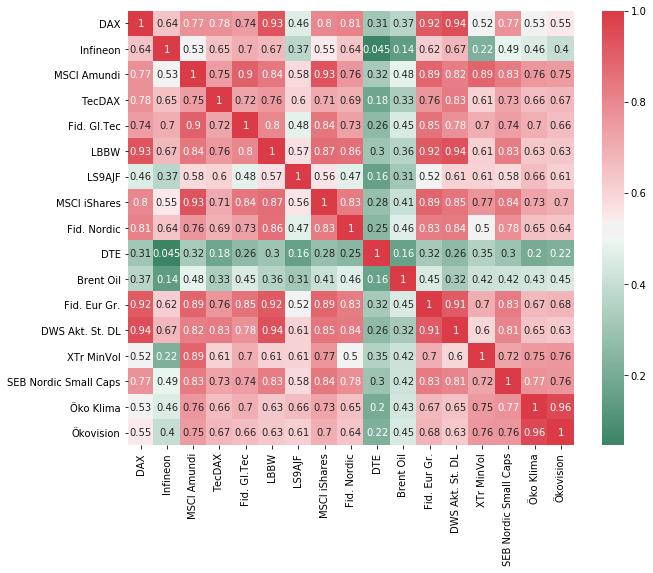

In [111]:
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches

#corr.style.background_gradient(cmap='coolwarm')
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cbar_kws={},cmap = cmap, annot=True, ax=ax)

In [113]:
#End